In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

/var/folders/h1/rvjbcw3x19dcwnv6qxb4pxrm0000gn/T/ipykernel_91044/2522317495.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                            index_col=0, parse_dates=True).dropna() 

In [3]:
raw.head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54
2010-01-14,29.918542,30.960,21.480,127.350,168.53,114.93,1148.46,17.63,1.4502,1142.85,48.60,112.03


In [4]:
data = pd.DataFrame(raw['EUR=']).rename(columns={'EUR=': 'price'})

data['SMA1'] = data['price'].rolling(42).mean()

data['SMA2'] = data['price'].rolling(252).mean()

In [5]:
data.tail(10)

,price,SMA1,SMA2
Date,,,
2019-12-17,1.1149,1.108155,1.120211
2019-12-18,1.1111,1.108017,1.120112
2019-12-19,1.1120,1.107950,1.120011
2019-12-20,1.1078,1.107840,1.119865
2019-12-23,1.1086,1.107738,1.119754
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333


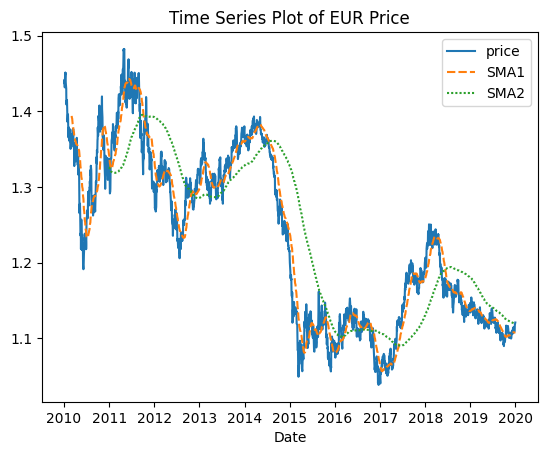

In [6]:
sns.lineplot(data=data)
plt.title('Time Series Plot of EUR Price')
plt.show()

In [11]:
fig = go.Figure()

# Assuming 'data' is a pandas DataFrame
legend_names = ['Original', 'SMA1', 'SMA2']  # replace with your legend names
for i, col in enumerate(data.columns):
    fig.add_trace(go.Scatter(
        y=data[col],
        mode='lines',
        name=legend_names[i],  # use the legend names here
    ))

fig.update_layout(
    title='Time Series of EUR Price',
)

fig.show()